In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [2]:
# portfolio of stocks
# S&P 500 (^GSPC)
# NASDAQ Composite (^IXIC)
# Dow Jones Industrial Average (^DJI)

stocks = ['^GSPC', '^IXIC', '^DJI']

#### Download historical data from TradingView API

In [3]:
# from tvDatafeed import TvDatafeed, Interval
# tv = TvDatafeed()

# num_stocks = len(stocks)


# # days calculation
# start_date = datetime(2010, 1, 1)
# today = datetime.now()
# days_difference = (today - start_date).days

# n_bars = min(days_difference + 100, 5000)  # max 5000 bars API limit

In [4]:
# # Exchange mapping
# stock_exchanges = {
#     'LULU': 'NASDAQ',
#     'ADBE': 'NASDAQ',
#     'PYPL': 'NASDAQ',
#     'NKE': 'NYSE',
#     'MC': 'EURONEXT'
# }

# # Download function with retry and error handling
# def download_with_retry(symbol, exchange, retries=3, delay=2):
#     for attempt in range(retries):
#         try:
#             print(f"Downloading {symbol} from {exchange} (attempt {attempt+1})")
#             data = tv.get_hist(
#                 symbol=symbol, 
#                 exchange=exchange, 
#                 interval=Interval.in_daily,
#                 n_bars=1000  # circa 4 anni di dati
#             )
#             if data is not None and not data.empty:
#                 print(f"✅ {symbol}: {len(data)} rows downloaded")
#                 return data
#         except Exception as e:
#             print(f"❌ Error downloading {symbol}: {e}")
        
#         if attempt < retries - 1:
#             time.sleep(delay)
    
#     print(f"❌ Failed to download {symbol} after {retries} attempts")
#     return None

In [5]:
# # Download to DataFrame
# print("🚀 Starting data download...")
# data_dict = {}
# failed_downloads = []

# for stock, exchange in stock_exchanges.items():
#     data = download_with_retry(stock, exchange)
#     if data is not None:
#         # keep only the Close and Volume columns and rename them
#         data_dict[stock] = data[['close', 'volume']].rename(
#             columns={'close': f'{stock}_close', 'volume': f'{stock}_volume'}
#         )
#     else:
#         failed_downloads.append(stock)

# if failed_downloads:
#     print(f"⚠️ Failed to download: {failed_downloads}")

# # Combine into a single DataFrame
# if data_dict:
#     df = pd.concat(data_dict.values(), axis=1)
#     print(f"📊 Combined DataFrame shape: {df.shape}")
#     print(f"📅 Date range: {df.index.min()} to {df.index.max()}")
#     print("\nFirst 5 rows:")
#     print(df.head())
# else:
#     print("❌ No data downloaded successfully")

In [6]:
# # count nan
# nan_counts = df.isna().sum()
# print("NaN counts per column:")
# print(nan_counts[nan_counts > 0])

# """
# NaN counts per column:
# LULU_close     1000
# LULU_volume    1000
# ADBE_close     1000
# ADBE_volume    1000
# PYPL_close     1000
# PYPL_volume    1000
# NKE_close      1000
# NKE_volume     1000
# MC_close       1000
# MC_volume      1000
# dtype: int64
# """

#### Download historical data from yf API

In [7]:
# import yfinance as yf

# start_date = "2020-01-01"
# end_date = datetime.now().strftime("%Y-%m-%d")

# # Download historical data from yf API
# data = yf.download(stocks, start=start_date, end=end_date, group_by='ticker')

# # download data to csv
# data.to_csv("INDEXES.csv")

#### Download analysis from csv downloaded data

In [8]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("INDEXES.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# rename tickers to more readable names, ^DJI -> DJ, ^GSPC -> SP, ^IXIC -> NQ
df.columns = pd.MultiIndex.from_tuples([
    (
        col[0].replace('^DJI', 'DJ').replace('^GSPC', 'SP').replace('^IXIC', 'NQ'),
        col[1]
    ) for col in df.columns
])


# Show the result
df.head()

DJ                                            \
                    Open          High           Low         Close   
Date                                                                 
2020-01-02  28638.970703  28872.800781  28627.769531  28868.800781   
2020-01-03  28553.330078  28716.310547  28500.359375  28634.880859   
2020-01-06  28465.500000  28708.019531  28418.630859  28703.380859   
2020-01-07  28639.179688  28685.500000  28565.279297  28583.679688   
2020-01-08  28556.140625  28866.179688  28522.509766  28745.089844   

                                  NQ                                         \
                 Volume         Open         High          Low        Close   
Date                                                                          
2020-01-02  251820000.0  9039.459961  9093.429688  9010.889648  9092.190430   
2020-01-03  239590000.0  8976.429688  9065.759766  8976.429688  9020.769531   
2020-01-06  252760000.0  8943.500000  9072.410156  8943.500000  9071.469727   
2020-01-07  258900000.0  9076.639648  9091.929688  9042.549805  9068.580078   
2020-01-08  291750000.0  9068.030273  9168.889648  9059.379883  9129.240234   

                                   SP                                         \
                  Volume         Open         High          Low        Close   
Date                                                                           
2020-01-02  2.862700e+09  3244.669922  3258.139893  3235.530029  3257.850098   
2020-01-03  2.586520e+09  3226.360107  3246.149902  3222.340088  3234.850098   
2020-01-06  2.810450e+09  3217.550049  3246.840088  3214.639893  3246.280029   
2020-01-07  2.381740e+09  3241.860107  3244.909912  3232.429932  3237.179932   
2020-01-08  2.472620e+09  3238.590088  3267.070068  3236.669922  3253.050049   

                          
                  Volume  
Date                      
2020-01-02  3.459930e+09  
2020-01-03  3.484700e+09  
2020-01-06  3.702460e+09  
2020-01-07  3.435910e+09  
2020-01-08  3.726840e+09

In [9]:
# # Here you can plot the charts for every ticker

# # For every ticker, plot Close
# import matplotlib.pyplot as plt

# for ticker in df.columns.levels[0]:
#     plt.figure(figsize=(12, 6))
#     plt.plot(df[ticker]['Close'], label=ticker)
#     plt.title(f"{ticker} Close Price")
#     plt.xlabel("Date")
#     plt.ylabel("Close Price")
#     plt.legend()
#     plt.show()

In [10]:
# df LULU, df level 0 = 'LULU'
sp = df['SP']

# drop Open, High, Low
sp = sp.drop(['Open', 'High', 'Low'], axis=1)

sp.head()

,Close,Volume
Date,,
2020-01-02,3257.850098,3.459930e+09
2020-01-03,3234.850098,3.484700e+09
2020-01-06,3246.280029,3.702460e+09
2020-01-07,3237.179932,3.435910e+09
2020-01-08,3253.050049,3.726840e+09


In [11]:
nq = df['NQ']

# drop Open, High, Low
nq = nq.drop(['Open', 'High', 'Low'], axis=1)

nq.head()

,Close,Volume
Date,,
2020-01-02,9092.190430,2.862700e+09
2020-01-03,9020.769531,2.586520e+09
2020-01-06,9071.469727,2.810450e+09
2020-01-07,9068.580078,2.381740e+09
2020-01-08,9129.240234,2.472620e+09


In [12]:
dj = df['DJ']

# drop Open, High, Low
dj = dj.drop(['Open', 'High', 'Low'], axis=1)

dj.head()

,Close,Volume
Date,,
2020-01-02,28868.800781,251820000.0
2020-01-03,28634.880859,239590000.0
2020-01-06,28703.380859,252760000.0
2020-01-07,28583.679688,258900000.0
2020-01-08,28745.089844,291750000.0


In [13]:
# Check the index type
print("Index type:", type(sp.index))
print("Index dtype:", sp.index.dtype)
print("First few index values:", sp.index[:5])

# Convert index to datetime if it's not already
if not isinstance(sp.index, pd.DatetimeIndex):
    sp.index = pd.to_datetime(sp.index)
    print("Index converted to DatetimeIndex")

print("New index type:", type(sp.index))

Index type: <class 'pandas.core.indexes.base.Index'>
Index dtype: object
First few index values: Index(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08'], dtype='object', name='Date')
Index converted to DatetimeIndex
New index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:

# Fix the datetime index for NQ and DJ as well
if not isinstance(nq.index, pd.DatetimeIndex):
    nq.index = pd.to_datetime(nq.index)
    print("NQ index converted to DatetimeIndex")

if not isinstance(dj.index, pd.DatetimeIndex):
    dj.index = pd.to_datetime(dj.index)
    print("DJ index converted to DatetimeIndex")

print("All indices are now DatetimeIndex")

NQ index converted to DatetimeIndex
DJ index converted to DatetimeIndex
All indices are now DatetimeIndex


: 

In [ ]:
# sp['Volume'].plot(kind='bar', figsize=(12, 6), title='SP Volume');
# Resample to monthly frequency
sp_monthly = sp.resample('M').agg({'Close': 'last', 'Volume': 'sum'})

fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for Volume
ax1.bar(sp_monthly.index, sp_monthly['Volume'], width=20, color='lightgray', label='Monthly Volume')
ax1.set_ylabel('Volume', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Line chart for Close price
ax2 = ax1.twinx()
ax2.plot(sp_monthly.index, sp_monthly['Close'], color='blue', label='Monthly Close')
ax2.set_ylabel('Close Price', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('S&P 500 Monthly Close Price & Volume')
fig.tight_layout()
plt.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'vscode'

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

px.histogram(sp, x='Volume', y='Close', nbins=150, orientation='h').show()

In [ ]:
# Histogram: sum of volume for price bin 
hist = go.Histogram(
    y=lulu['Close'],
    x=lulu['Volume'],
    nbinsy=150,
    orientation='h',
    name='Volume Profile',
    marker_color='#B0C4DE',
    opacity=0.5,         # Bins opacity
    xaxis='x2',
)

# Line plot: Close prices over time
line = go.Scatter(
    x=lulu.index,
    y=lulu['Close'],
    mode='lines',
    name='LULU Close',
    marker_color='blue',
    xaxis='x',
    yaxis='y',
)

# First we plot the histogram, then the line chart
fig = go.Figure([hist, line])

fig.update_layout(
    xaxis=dict(
        title='Date',
        anchor='y',
        domain=[0, 1],
        showgrid=False,
        side='bottom'
    ),
    xaxis2=dict(
        title='Sum of Volume',
        overlaying='x',
        side='top',
        showgrid=False
    ),
    yaxis=dict(
        title='Close Price',
        showgrid=True
    ),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    height=600,
    title='Volume Profile & LULU Close Prices'
)

fig.show()

In [ ]:
# Kernel Density Estimator (KDE) plot
from scipy import stats, signal

"""
stats provides statistical functions and probability distributions for data analysis.

signal offers tools for signal processing, such as filtering, peak detection, 
and Fourier transforms.

These modules are commonly used for advanced data analysis and scientific computing in Python.
"""

kde_factor = 0.05
num_samples = 500
kde = stats.gaussian_kde(lulu.Close,weights=lulu.Volume,bw_method=kde_factor)
xr = np.linspace(lulu.Close.min(),lulu.Close.max(),num_samples)
kdy = kde(xr)
ticks_per_sample = (xr.max() - xr.min()) / num_samples

def get_dist_plot(c, v, kx, ky):
    fig = go.Figure()
    fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
                               histfunc='sum', histnorm='probability density',
                               marker_color='#B0C4DE'))
    fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))
    return fig

get_dist_plot(lulu.Close, lulu.Volume, xr, kdy).show()

The Kernel Density Estimator (KDE) is a non-parametric method to estimate the probability density function of a continuous variable. It smooths the observed data using a kernel function, providing a continuous curve that represents the distribution of the data. KDE is useful for visualizing the underlying structure of the data, identifying modes, and comparing distributions.

In [ ]:
# Volume Peaks
peaks,_ = signal.find_peaks(kdy)
pkx = xr[peaks]
pky = kdy[peaks]

pk_marker_args=dict(size=10)
fig = get_dist_plot(lulu.Close, lulu.Volume, xr, kdy)
fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))

In [ ]:
# Find peaks, peak_props
peaks, peak_props = signal.find_peaks(kdy, prominence=0.00001)

pkx = xr[peaks]
pky = kdy[peaks]

# Fig 
fig = get_dist_plot(lulu.Close, lulu.Volume, xr, kdy)

# Add peaks markers
fig.add_trace(go.Scatter(
    x=pkx, y=pky,
    mode="markers",
    name="Peaks",
    marker=dict(color="blue", size=8, symbol="circle")
))

# Draw vertical lines from the peaks downwards (prominence)
for x, y0, prom in zip(pkx, pky, peak_props["prominences"]):
    fig.add_shape(
        type="line",
        xref="x", yref="y",
        x0=x, x1=x,
        y0=y0, y1=y0 - prom,
        line=dict(color="red", width=2)
    )

fig.show()

In [ ]:
# Peak Width
width_range=1
peaks, peak_props = signal.find_peaks(kdy, prominence=0.00001, width=width_range)

left_ips = peak_props['left_ips']
right_ips = peak_props['right_ips']
width_x0 = xr.min() + (left_ips * ticks_per_sample)
width_x1 = xr.min() + (right_ips * ticks_per_sample)
width_y = peak_props['width_heights']

fig = get_dist_plot(lulu.Close, lulu.Volume, xr, kdy)
fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

In [ ]:
# !pip install marketprofile

# # https://marketprofile.readthedocs.io/en/latest/

In [ ]:
from market_profile import MarketProfile

mp = MarketProfile(lulu)
mp_slice = mp[lulu.index.min():lulu.index.max()]

In [ ]:
mp_slice.profile

Close
139.00    4568200.0
140.40    3809600.0
144.90    3764700.0
154.90    2989600.0
165.05    5338000.0
            ...    
508.85     816400.0
509.25     688700.0
510.00    1179500.0
511.05     896600.0
511.30     918300.0
Name: Volume, Length: 1194, dtype: float64

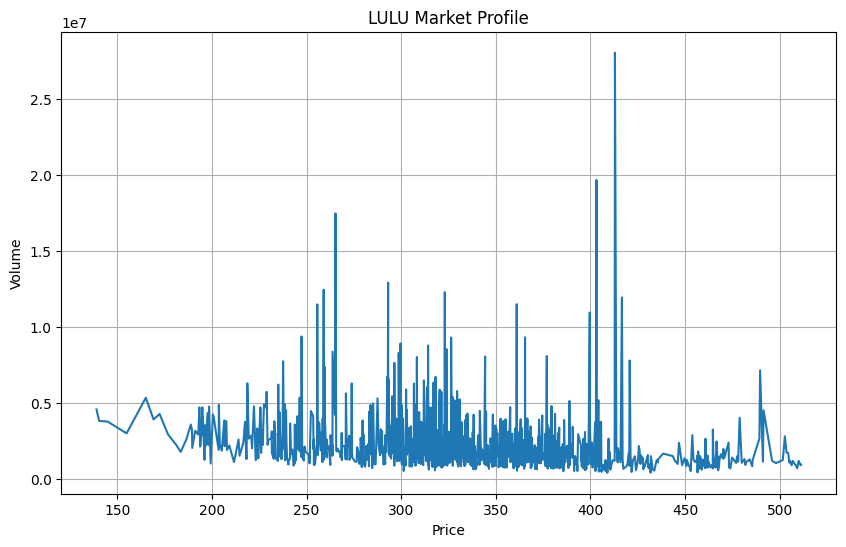

In [ ]:
# plot mp_slice.profile
plt.figure(figsize=(10,6))
plt.plot(mp_slice.profile.index, mp_slice.profile.values)
plt.title('LULU Market Profile')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid()
plt.show()

In [ ]:
# mp_slice.initial_balance()
# mp_slice.open_range()

In [ ]:
mp_slice.poc_price

np.float64(412.95)

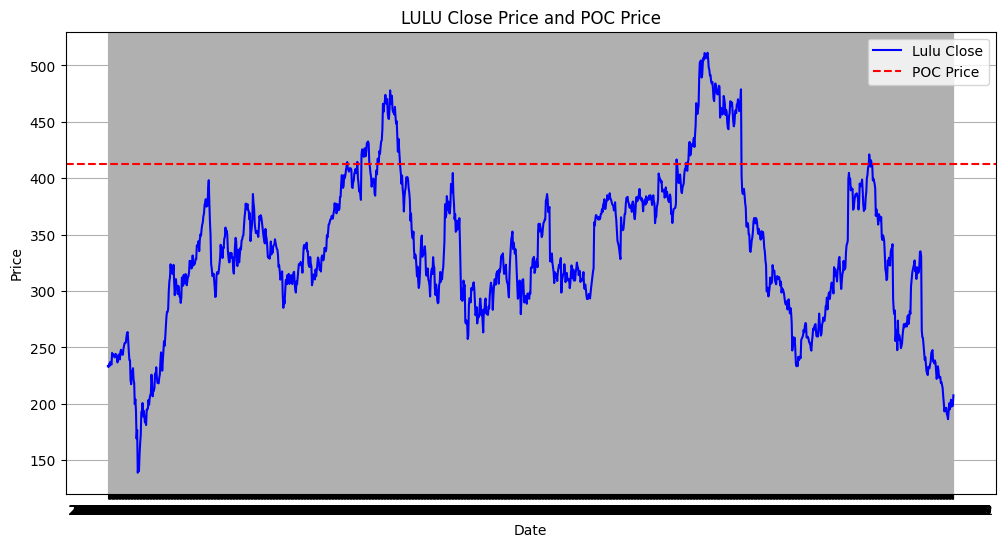

In [ ]:
# plot lulu.Close and mp_slice.poc_price as horizontal line 
plt.figure(figsize=(12,6))
plt.plot(lulu.index, lulu['Close'], label='Lulu Close', color='blue')
plt.axhline(mp_slice.poc_price, label='POC Price', color='red', linestyle='--')
plt.title('LULU Close Price and POC Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mp_slice.profile_range

(np.float64(139.0), np.float64(511.3))

In [ ]:
mp_slice.value_area

(np.float64(295.15), np.float64(511.3))

In [ ]:
mp_slice.balanced_target

np.float64(686.9)

In [ ]:
mp_slice.low_value_nodes

Close
154.90    2989600.0
169.15    3906800.0
183.50    1767800.0
189.60    2027200.0
192.75    2912900.0
            ...    
498.05    1029200.0
505.15    1063000.0
506.35     887300.0
509.25     688700.0
511.05     896600.0
Name: Volume, Length: 390, dtype: float64

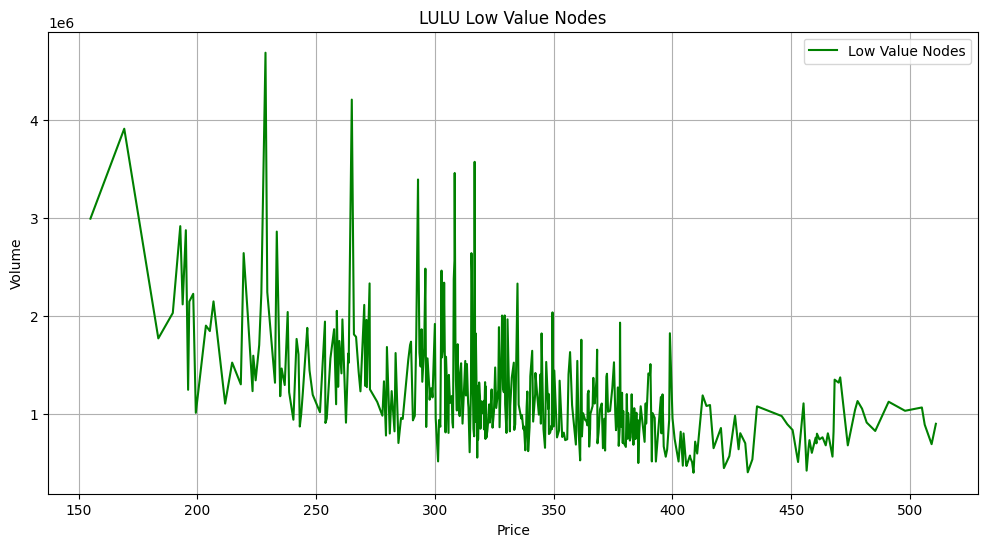

In [ ]:
# plot mp_slice.low_value_nodes
plt.figure(figsize=(12,6))
plt.plot(mp_slice.low_value_nodes.index, mp_slice.low_value_nodes.values, label='Low Value Nodes', color='green')
plt.title('LULU Low Value Nodes')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mp_slice.high_value_nodes

Close
165.05    5338000.0
172.35    4267500.0
188.85    3572100.0
191.15    3160100.0
193.35    4697900.0
            ...    
491.50    4504700.0
502.75    2799000.0
505.40    1187800.0
506.90    1174800.0
510.00    1179500.0
Name: Volume, Length: 389, dtype: float64

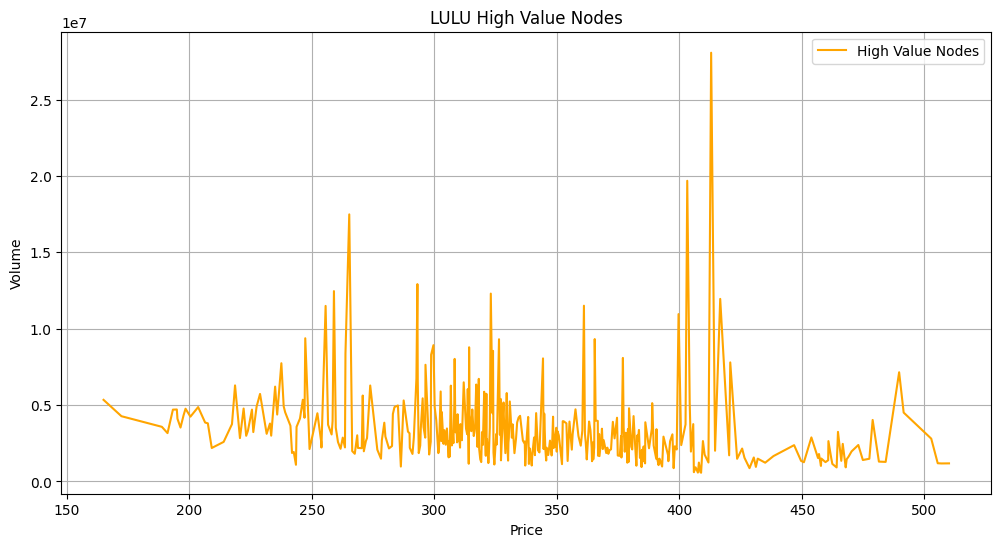

In [ ]:
# plot mp_slice.high_value_nodes
plt.figure(figsize=(12,6))
plt.plot(mp_slice.high_value_nodes.index, mp_slice.high_value_nodes.values, label='High Value Nodes', color='orange')
plt.title('LULU High Value Nodes')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

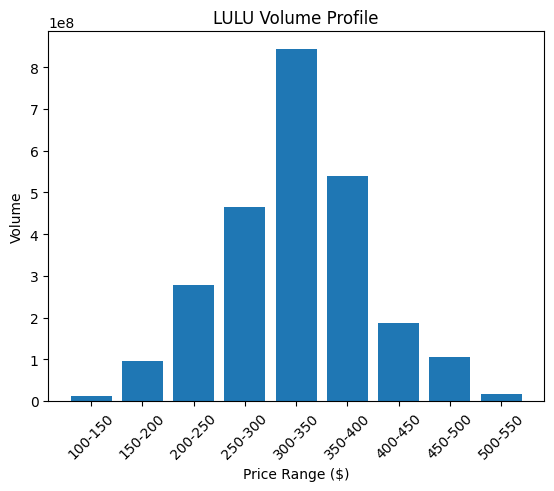

In [ ]:
# Calculate the price range and bin edges every $50
bin_size = 50
min_price = np.floor(lulu.Close.min() / bin_size) * bin_size
max_price = np.ceil(lulu.Close.max() / bin_size) * bin_size
bin_edges = np.arange(min_price, max_price + bin_size, bin_size)
num_bins = len(bin_edges) - 1

# Use np.histogram to sum volumes in each price bin
volume_profile, _ = np.histogram(lulu.Close, bins=bin_edges, weights=lulu.Volume)

# Plot the Volume Profile
plt.bar(range(num_bins), volume_profile, width=0.8, align='center')
plt.xticks(
    range(num_bins),
    [f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}' for i in range(num_bins)],
    rotation=45
)
plt.xlabel('Price Range ($)')
plt.ylabel('Volume')
plt.title('LULU Volume Profile')
plt.show()

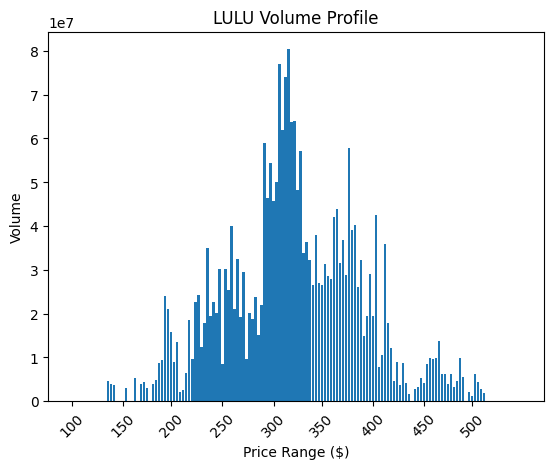

In [ ]:
# Volume profile with 150 bins, labels every 50$
num_bins = 150
min_price = np.floor(lulu.Close.min() / 50) * 50
max_price = np.ceil(lulu.Close.max() / 50) * 50
bin_edges = np.linspace(min_price, max_price, num_bins + 1)

# Calculate the aggregated volume for each bin
volume_profile, _ = np.histogram(lulu.Close, bins=bin_edges, weights=lulu.Volume)

# Find the positions of the ticks closest to the multiples of 50
xtick_labels = []
xtick_positions = []
for price in np.arange(min_price, max_price + 1, 50):
    # Find the bin closest to the desired tick
    idx = np.argmin(np.abs(bin_edges - price))
    if idx < num_bins:  # only if the bin is valid
        xtick_positions.append(idx)
        xtick_labels.append(f'{int(price)}')

# Plot
plt.bar(range(num_bins), volume_profile, width=0.8, align='center')
plt.xticks(xtick_positions, xtick_labels, rotation=45)
plt.xlabel('Price Range ($)')
plt.ylabel('Volume')
plt.title('LULU Volume Profile')
plt.show()

#### Plot of Volume Profile for All Stocks

In [ ]:
stocks_ = ['LULU', 'PYPL', 'NKE', 'ADBE']

for stock in stocks_:
    # Usa una variabile temporanea per ogni stock
    df_stock = df[stock][['Close', 'Volume']]

    # plot
    hist = go.Histogram(
        y=df_stock['Close'],
        x=df_stock['Volume'],
        nbinsy=150,
        orientation='h',
        name='Volume Profile',
        marker_color='#B0C4DE',
        opacity=0.5,
        xaxis='x2',
    )

    line = go.Scatter(
        x=df_stock.index,
        y=df_stock['Close'],
        mode='lines',
        name='Close',
        marker_color='blue',
        xaxis='x',
        yaxis='y',
    )

    fig = go.Figure([hist, line])

    fig.update_layout(
        xaxis=dict(
            title='Date',
            anchor='y',
            domain=[0, 1],
            showgrid=False,
            side='bottom'
        ),
        xaxis2=dict(
            title='Sum of Volume',
            overlaying='x',
            side='top',
            showgrid=False
        ),
        yaxis=dict(
            title='Close Price',
            showgrid=True
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        height=600,
        title=f'Volume Profile & {stock} Close Prices'
    )

    fig.show()

In [ ]:
# !pip install -U kaleido

# kaleido library is used for static image export of Plotly figures, 
# required for saving figures as images

In [ ]:
# # Same iteration for all stocks as previous cell, just added the image saving with kaleido

# stocks_ = ['LULU', 'PYPL', 'NKE', 'ADBE']

# for stock in stocks_:
#     df_stock = df[stock][['Close', 'Volume']]

#     hist = go.Histogram(
#         y=df_stock['Close'],
#         x=df_stock['Volume'],
#         nbinsy=150,
#         orientation='h',
#         name='Volume Profile',
#         marker_color='#B0C4DE',
#         opacity=0.5,
#         xaxis='x2',
#     )

#     line = go.Scatter(
#         x=df_stock.index,
#         y=df_stock['Close'],
#         mode='lines',
#         name='Close',
#         marker_color='blue',
#         xaxis='x',
#         yaxis='y',
#     )

#     fig = go.Figure([hist, line])

#     fig.update_layout(
#         xaxis=dict(
#             title='Date',
#             anchor='y',
#             domain=[0, 1],
#             showgrid=False,
#             side='bottom'
#         ),
#         xaxis2=dict(
#             title='Sum of Volume',
#             overlaying='x',
#             side='top',
#             showgrid=False
#         ),
#         yaxis=dict(
#             title='Close Price',
#             showgrid=True
#         ),
#         legend=dict(
#             orientation='h',
#             yanchor='bottom',
#             y=1.02,
#             xanchor='right',
#             x=1
#         ),
#         height=600,
#         title=f'Volume Profile & {stock} Close Prices'
#     )

#     fig.show()

#     # Salva il grafico come JPG
#     fig.write_image(f"{stock}_volume_profile.jpg", format="jpg")

Index type: <class 'pandas.core.indexes.base.Index'>
Index dtype: object
First few index values: Index(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08'], dtype='object', name='Date')
Index converted to DatetimeIndex
New index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


NQ index converted to DatetimeIndex
DJ index converted to DatetimeIndex
All indices are now DatetimeIndex
